<a href="https://colab.research.google.com/github/Dunith-Code/Frozen-Lake/blob/main/FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gymnasium
import random
import time

from IPython.display import clear_output

In [ ]:
env=gymnasium.make("FrozenLake-v1")

In [ ]:
q_table=np.zeros((16,4)) #initaial table
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
num_episodes=10000
max_steps_per_episode=100
learning_rate=0.1
discount_rate=0.99
exploration_rate=1
max_exploration_rate=1
min_exploration_rate=0.01
exploration_decay_rate=0.001

In [ ]:
random.uniform(0,1)

0.2760742136993143

In [ ]:
all_rewards=[]

for episode in range(num_episodes):
    state = env.reset()[0] # Accessing the first element (state) from the tuple returned by env.reset()
    done=False

    rewards_current_episode=0

    for step in range(max_steps_per_episode):
      exploration_rate_threshold=random.uniform(0,1)

      if(exploration_rate_threshold>exploration_rate):
        action=np.argmax(q_table[state,:])
      else:
        action=env.action_space.sample()

      new_state,reward,terminated,truncated,info=env.step(action)
      done = terminated or truncated

      q_table[state,action]=q_table[state,action]*(1-learning_rate)+learning_rate*(reward+discount_rate*np.max(q_table[new_state,:]))

      state=new_state

      rewards_current_episode=rewards_current_episode+reward

      if(done==True):
          break

    exploration_rate=min_exploration_rate+(max_exploration_rate-min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    all_rewards.append(rewards_current_episode)

In [ ]:
print(len(all_rewards),all_rewards)

10000 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
all_rewards=np.array(all_rewards)

all_rewards=all_rewards.reshape(10,1000)
reward_per_thousand_epochs=np.mean(all_rewards,axis=1)

print(reward_per_thousand_epochs)

[0.042 0.184 0.423 0.53  0.616 0.67  0.692 0.649 0.651 0.691]


Text(0, 0.5, 'Average Reward')

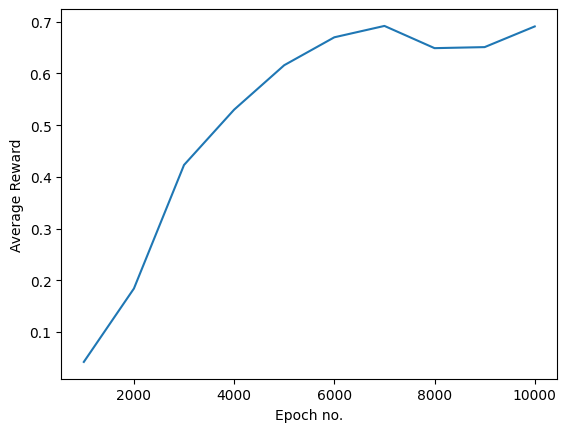

In [ ]:
from matplotlib import pyplot as plt

epochs=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

plt.plot(epochs,reward_per_thousand_epochs)
plt.xlabel('Epoch no.')
plt.ylabel('Average Reward')

In [ ]:
print('=============Updated Q Table=============')
print(q_table)

=============Updated Q Table=============
[[0.55242802 0.4960742  0.46136355 0.47621822]
 [0.28024855 0.2860706  0.29463642 0.47123109]
 [0.35098775 0.28601168 0.22954917 0.25514352]
 [0.07299883 0.1595682  0.03922057 0.05378417]
 [0.57757349 0.41455504 0.45420784 0.43704547]
 [0.         0.         0.         0.        ]
 [0.12309474 0.11497592 0.38514427 0.18659191]
 [0.         0.         0.         0.        ]
 [0.35468041 0.33560706 0.39678646 0.62207165]
 [0.4878561  0.65898355 0.51403204 0.35554821]
 [0.63379195 0.35301826 0.28006377 0.33469414]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.56646597 0.49979272 0.83499163 0.59690893]
 [0.70413277 0.92417898 0.76601498 0.71528522]
 [0.         0.         0.         0.        ]]


In [ ]:
for episode in range(3):
    # Unpack the initial state and info dictionary
    state, info = env.reset()
    done = False
    print('==================EPISODE ', episode + 1, '==================')
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)

        # Now 'state' is an integer, so this indexing will work
        action = np.argmax(q_table[state, :])

        # Unpack 5 values: observation, reward, terminated, truncated, info
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        if done:
            clear_output(wait=True)
            env.render()

            if reward == 1:
                print('**********Reached the Goal**********')
            else:
                print('**********Fallen to the Hole**********')

            time.sleep(3)
            clear_output(wait=True)
            break

        state = new_state

env.close()

**********Reached the Goal**********
